<font size=6  color=#003366> <div style="text-align: center"> [LGBIO2050] - Medical Imaging <br><br> 
<div style="text-align: center"> Challenge 2 - Image Denoising  </font> <br><br><br>

<font size=5  color=#003366>
<div style="text-align: left"> Professors :   
<font size=4  color=#003366>
<div style="text-align: left"> Prof. G. Kerckhofs  
<div style="text-align: left"> Prof. J. Lee <br>
<div style="text-align: left"> Prof. B. Macq <br>
<div style="text-align: left"> Prof. F. Peeters
<font size=5  color=#003366>
    
<br> <br>
<div style="text-align: left"> Teaching assistants : 
<font size=4  color=#003366>
<div style="text-align: left"> Damien Dasnoy-Sumell (damien.dasnoy@uclouvain.be)<br> 
<div style="text-align: left">Estelle Loÿen (estelle.loyen@uclouvain.be)
<font size=5  color=#003366>
<div style="text-align: right"> 2021-2022 </div>
<br><br>
</font>

<font size=6 color=#009999> 1. Guidelines and Deliverables </font> <br> 
   - This assignment is due on **The 14th October 2021**.
   - Copying code or answers from other groups (or from the internet) is strictly forbidden. Each source of inspiration must be clearly indicated.
   - The jupyter notebook containing the code and **detailed answers** to the questions must be delivered in an
archive (.zip folder) on Moodle. The answers have to be written in English.<br> <br>

<font size=6 color=#009999> 2. Context </font> <br> <br>

<div style="text-align: justify">Like any other kind of images, medical imaging techniques are susceptible to noise and artifacts. Noise can be defined as a modification of the overall brightness of an image. Depending on the event at the origin of the noise (particle's physics, electronic device imprecision, patient motion, etc.), the perturbation can appear in various forms and noise removal techniques have to be adapted. <br><br>

<div style="text-align: justify">In this challenge, we are interested in removing noise that follows a gaussian distribution. Such presence of noise makes the images unclear and may perplex the identification and analysis of diseases by a physician. Hence, denoising of medical images is a mandatory and essential pre-processing technique for further medical image processing stages.  <br><br>


<font size=5 color=#009999> 2.1 Noise model </font> <br><br>

<div style="text-align: justify">Let's denote our discrete image by $x_n$. Noise is a perturbation of $x_n$ corresponding to the addition of the signal $b_n$. The noisy signal $y_n$ is given by: 
$$ y_n = x_n + b_n $$ 

<div style="text-align: justify">In this situation, $b_n$ is a continuous random variable. We speak about "gaussian noise" when the probability density function (PDF) of this random variable is a centered gaussian function. The PDF is given by: 
$$ p(x) = \frac{1}{\sigma \sqrt{2 \pi}} \text{exp}\left( -\frac{x^2}{2 \sigma^2} \right) $$

<div style="text-align: justify">Sensor equipements usually induce noise that can be considered as gaussian. It allows to define the standard deviation $\sigma$ as the mesurement uncertainty. Random variables following a gaussian distribution can be generated thanks to the <samp>numpy.random.normal</samp> function. <br><br>

<font size=5 color=#009999> 2.2 Evaluation metric </font> <br><br>

<div style="text-align: justify">The signal-to-noise ratio (SNR), a commonly used metric of denoising methods, is defined as the ratio of the squared amplitude or variance of a signal relative to the variance of the noise. For a noisy image $y_n$ and its denoised approximation $\hat{x_n}$, the SNR in decibels is given by:

$$
\mathit{SNR} = 10\cdot \log_{10}\left(\frac{\sum_{i,j}x_n^2(i,j)}{\sum_{i,j}e^2(i,j)}\right)
$$

where $e = x_n - \hat{x_n}$ is the approximation error and $i,j$ are the number of rows and columns in the image.

<div class="alert alert-info">
<b>QUESTION 1</b>  <br>
<div style="text-align: justify">In the following cell, import the chest radiograph image stored in the file named <samp>ChestXRay.jpeg</samp>. Corrupt this image with additive gaussian noise. For an image normalized between 0 and 255, consider a gaussian noise of zero mean and standard deviation of 5. <br>
Show your results with a plot of the pure image, the noisy image and the absolute value of the difference between them. <br><br>

Then, compute the SNR between the orignal "pure" image and its noisy version. How do you interpret this value, what are the units of this metric (5-10 lines)? 
</div>

Write here your answer to question 1

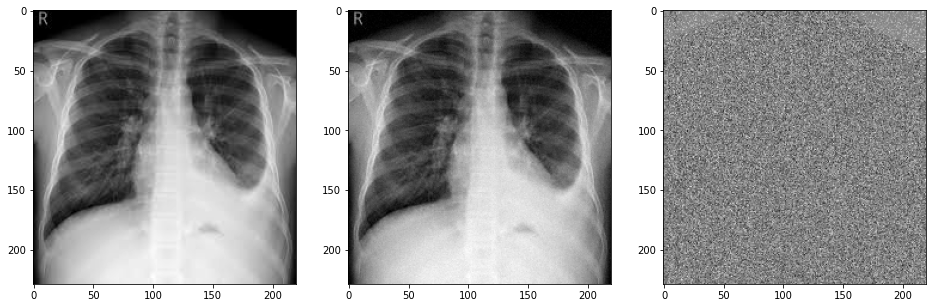

In [13]:
from skimage.io import imread,imshow
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np

img = imread("imgs/ChestXRay.jpeg")

#### noise
noise = np.random.normal(0,5,size=img.shape)

img_with_noise = img + noise
img_with_noise[img_with_noise<0]=0
img_with_noise[img_with_noise>255]=255
### plot
plt.figure(figsize=(16, 12))
plt.subplot(231)
plt.imshow(rgb2gray(img),cmap="gray")

plt.subplot(232)
plt.imshow(rgb2gray(img_with_noise),cmap="gray")

plt.subplot(233)
plt.imshow(rgb2gray(img_with_noise-img),cmap="gray")

<br> <br>
<font size=6 color=#009999> 3. Filtering in the spatial domain </font> <br> <br>

The first denoising method illustrated in this challenge relies on the convolution between the noisy image and a gaussian kernel. This operation is also referred to as "bluring operator" in the literature. <br><br>

<font size=5 color=#009999> 3.1 Implementation of the convolution operator (short reminder) </font> <br><br>

Let F be the discrete function with all samples of the original image and let W be the kernel, the resulting image G  is then called the filtering of the image by the kernel W:
$$ G(i,j) = \sum_{k=-\infty}^{+\infty}\, \sum_{l=-\infty}^{+\infty} F(i+k, j+l)\,W(k,l)$$

<div style="text-align: justify">In practice the kernel has non zero values only in small neighborhood of the origin. Assume that W(k,l) is non zero only in the neighborhood for k=−K,..,+K and l=−L,..,+L. <br>
<div style="text-align: justify">Also, we have to deal with the fact that the image is defined only on a finite domain. Then the indices (i+l,j+l) can point outside the image (see the border problem) and we have to decide what value to use for F(i+k,j+l).<br><br>

<font size=5 color=#009999> 3.2 Gaussian Kernel </font> <br><br>

<div style="text-align: justify">In order to perform the blurring operation, we need to design a proper kernel. The kernel that we propose is a gaussian filter. In this kernel, all coefficients follow a 2D gaussian distribution. By this way, more weight is given to the central pixels and less weight to the neighbours.<br>
For our application, we provide you the <samp>gaussianKernel</samp> that computes a gaussian or "blurring" kernel. 

<div class="alert alert-info">
<b>QUESTION 2</b>  <br>
<div style="text-align: justify">Implement yourself the <samp>linearFilter</samp> function with the specifications given below. Then use it to decrease the noise level in the artificially noisy image. Show and quantify, with the SNR metric, the gain brought by this operation and comment your results (10-15 lines).
</div>

Write here your answer to question 2

In [1]:
def gaussianKernel(size, fwhm = 3):
    """ gaussianKernel returns a gaussian kernel of size (sizew x size)
    INPUTS : 
        - size: length of a side of the square
        - fwhm: full-width-half-maximum (can be thought of as an effective radius)
    OUTPUT: 
        - gaussian kernel with above specifications
    """
    x      = np.arange(0, size, 1, float)
    y      = x[:,np.newaxis]
    x0     = y0 = size // 2
    kernel = np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)
    
    return kernel/np.sum(kernel)



def linearFilter(f, w):
    """ linearFilter implements the convolution of 2D image by a 2D kernel
    INPUTS : 
        - f: image to be filtered
        - w: kernel
    OUTPUT: 
        - result of the convultion between f and w
    """
    
    return f


<br> <br>
<font size=6 color=#009999> 4. Filtering in the frequency domain </font> <br> <br>

<div style="text-align: justify">Unlike the previous approach that modifies the image directly in the spatial domain, this second method relies on the modification of the image's Fourier Transform. Due to the prior knowledge about the noise distribution, we know that the noise that we want to remove corresponds to higher frequency content in the noisy image. Then, the method is implemented as follow : 
   1. Compute the Fourier Transform/spectrum of the noisy image
   2. Compute a binary mask (disk or renctangular shape centered in (0,0)) such that the multiplication of the noisy image's spectrum with respect to the mask will put higher frequencies to zero. (In practice, setting the coefficients of the Fourier Transform to 0.01 instead of 0.0 will lead to better results). 
   3. Compute the inverse Fourier Transform of this modified spectrum. 
   
   
<div class="alert alert-info">
<b>QUESTION 3</b>  <br>
<div style="text-align: justify">Implement this method to decrease the noise level in the artificially noisy image. Show the images and the spectrums, and quantify, with the SNR metric, the gain brought by this operation and comment your results (10-15 lines).
</div>

Write here your answer to question 3

<div class="alert alert-info">
<b>QUESTION 4</b>  <br>
Consider a new noise model that modifies only specific frequencies of the images (instead of following a gaussian distribution). It can be for example the power line noise occuring cause of alternating current in electronic devices which is known to alter frequencies around 50 Hz. <br>
Which of the two methods (in spatial or frequency domain) would you use to remove this noise. Argument you answer (5-10 lines). 
</div>

Write here your answer to question 4